<a href="https://colab.research.google.com/github/Igben-Nehemiah/ML-practice/blob/main/ML_for_Process_Systems_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Scripting Environment

In [ ]:
import numpy as np

In [ ]:
arr = np.array([[1, 4, 6], [2, 5, 7]])

print(arr.size) # 6
print(arr.ndim) # 2
print(arr.shape) # (2, 3)

6
2
(2, 3)


In [ ]:
arr1 = np.array([[1, 4, 6], [2, 5, 7]])

arr2 = np.array([[2], [4]])

arr1 + arr2

array([[ 3,  6,  8],
       [ 6,  9, 11]])

In [ ]:
import pandas as pd


In [ ]:
data = np.arange(6).reshape(3, 2)

df = pd.DataFrame(data=data, columns=["id", "value"])
df

,id,value
0,0,1
1,2,3
2,4,5


In [ ]:
df.groupby('id').mean()

,value
id,
0,1.0
2,3.0
4,5.0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [ ]:
data = np.array([
    [-5, 19],
    [-4.4, 18],
    [-4.35, 17.8],
    [-4.1, 16],
    [-4.05, 12.2],
    [-4, 12]
])

x = data[:, 0:1]
y = data[:, 1:]

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)

X_poly

array([[-5.    , 25.    ],
       [-4.4   , 19.36  ],
       [-4.35  , 18.9225],
       [-4.1   , 16.81  ],
       [-4.05  , 16.4025],
       [-4.    , 16.    ]])

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X_poly)

array([[-2.01019039,  2.04058499],
       [-0.24514517,  0.19940658],
       [-0.09805807,  0.05658468],
       [ 0.63737744, -0.6330411 ],
       [ 0.78446454, -0.7660695 ],
       [ 0.93155164, -0.89746565]])

In [ ]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
y_predicted = model.predict(X_poly)

In [ ]:
y_predicted

array([[18.94554751],
       [18.38101741],
       [17.86874711],
       [14.23379687],
       [13.29208707],
       [12.27880403]])

In [ ]:
print('Fit accuracy=', r2_score(y, y_predicted))

Fit accuracy= 0.9023349965626839


Text(0, 0.5, 'y')

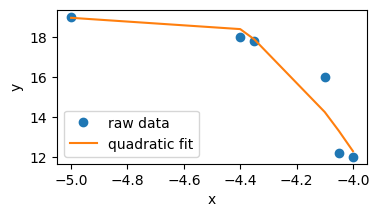

In [ ]:
plt.figure(figsize=(4,2))
plt.plot(x, y, 'o', label='raw data')
plt.plot(x, y_predicted, label='quadratic fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Machine Learning Model Development: Workflow and Best Practices


**Data Pre-processing: Data Transformation**

In [ ]:
X = np.array([
    [1000, 0.01, 300],
    [1200, 0.06, 350],
    [1500, 0.1, 320]
])

scaler = StandardScaler().fit(X)

In [ ]:
scaler

StandardScaler()

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
X_scaled

array([[-1.13554995, -1.26750044, -1.13554995],
       [-0.16222142,  0.09053575,  1.29777137],
       [ 1.29777137,  1.1769647 , -0.16222142]])

### One-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
x = np.array([
    ['type A'],
    ['type C'],
    ['type B'],
    ['type C']
])

ohe = OneHotEncoder(sparse_output=False) # sparse_output = False returns array
X_encoded = ohe.fit_transform(x)

### Workflow automation via pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
data = np.array([
    [-5, 19],
    [-4.4, 18],
    [-4.35, 17.8],
    [-4.1, 16],
    [-4.05, 12.2],
    [-4, 12]
])

x = data[:, 0:1]
y = data[:, 1:]

pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

pipe.fit(x, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
pipe.predict(x)

array([[18.94554751],
       [18.38101741],
       [17.86874711],
       [14.23379687],
       [13.29208707],
       [12.27880403]])

### Model Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = np.array([
    [-5, 19],
    [-4.4, 18],
    [-4.35, 17.8],
    [-4.1, 16],
    [-4.05, 12.2],
    [-4, 12]
])

x = data[:, 0:1]
y = data[:, 1:]

In [ ]:
# R2 metrics

model = LinearRegression()
model.fit(x, y)
model.predict(x)

array([[20.32427885],
       [16.38100962],
       [16.05240385],
       [14.409375  ],
       [14.08076923],
       [13.75216346]])

In [ ]:
model.score(x, y)

0.6438355834004028

In [ ]:
# Classification metrics
# Holdout method / Cross-validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


# Data Pre-processing: Cleaning Process Data

### Signal de-noising

#### Simple Moving Average (SMA)

In [ ]:
noisy_signal = np.loadtxt('noisy_flow_signal.csv', delimiter=',')

In [ ]:
windowSize = 15
smoothed_signal_MA = pd.DataFrame(noisy_signal).rolling(windowSize).mean().values # taking mean on a rolling window and converting back to numpy array


Text(0.5, 1.0, 'Flow Signal')

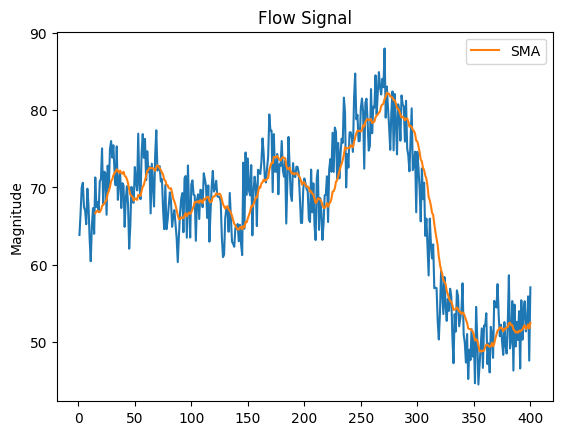

In [ ]:
x_values = np.arange(1, noisy_signal.size + 1)

plt.plot(x_values, noisy_signal)
plt.plot(x_values, smoothed_signal_MA, label='SMA')
plt.legend()
plt.ylabel('Magnitude')
plt.title('Flow Signal')

#### Savitzky-Golay (SG) filtering

In [ ]:
from scipy.signal import savgol_filter
smoothed_signal_SG = savgol_filter(noisy_signal, window_length = 15, polyorder = 2)


In [ ]:
x_values = np.arange(1, noisy_signal.size + 1)

plt.plot(x_values, noisy_signal)
plt.plot(x_values, smoothed_signal_SG, label='SG')
plt.legend()
plt.ylabel('Magnitude')
plt.title('Flow Signal')

### Variable Selection / Feature Selection

#### Filter Methods

In [ ]:
data = np.loadtxt('VSdata.csv', delimiter=',')

In [ ]:
y = data[:,0]
x = data[:, 1:]

In [ ]:
# compute linear correlation-based scores
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [ ]:
VSmodel = SelectKBest(f_regression, k=10).fit(x, y)
input_scores = VSmodel.scores_

In [ ]:
input_scores

array([1.58054554e-01, 9.56982590e-07, 1.06741202e-02, 7.13517910e-02,
       1.00220380e+00, 1.95081540e-01, 5.78214081e-04, 5.28794820e-03,
       1.00480482e-01, 1.03726309e-02, 1.34835584e-01, 6.71665197e-02,
       3.06953819e-02, 9.53686270e-01, 1.31552949e-01, 3.79521770e-03,
       5.68236645e-05, 8.72546619e-02, 9.80420682e-01, 5.88523724e+00,
       1.02040870e+01, 1.68050590e+01, 4.62986741e-01, 6.96314987e+00,
       7.16226729e-01, 8.92436878e-01, 1.27677836e+00, 1.82109167e+00,
       3.07480730e+00, 4.64043235e+00, 2.36122731e+00, 2.96796543e+00,
       5.45006498e-02, 2.59400142e-03, 1.53338601e-02, 8.61795433e-02,
       2.91853013e-01, 4.46758182e-02, 9.96211066e-02, 2.46061366e-01])

In [ ]:
top_k_inputs = np.argsort(input_scores)[::-1][:10] + 1
top_k_inputs

array([22, 21, 24, 20, 30, 29, 32, 31, 28, 27])

In [ ]:
x_relevant = VSmodel.transform(x)


#### Wrapper Methods

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

X = x
xscaler = StandardScaler()
X_scaled = xscaler.fit_transform(X)
yscaler = StandardScaler()
y_scaled = yscaler.fit_transform(y[:,None])

In [ ]:
# implement backward SFS
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression


In [ ]:
BSFS = SequentialFeatureSelector(LinearRegression(), n_features_to_select=10, direction='backward',
cv=5).fit(X_scaled, y_scaled)

In [ ]:
# check selected inputs
print('Inputs selected: ', BSFS.get_support(indices=True)+1) # Added one to account for the output column

Inputs selected:  [18 19 20 21 22 23 24 25 31 33]


In [ ]:
# reduce X to only top relevant inputs
X_relevant = BSFS.transform(X)

#### Embedded methods

In [ ]:
# fit Lasso model
from sklearn.linear_model import LassoCV

Lasso_model = LassoCV(cv=5).fit(X_scaled, y_scaled.ravel())

# find the relevant inputs using model coefficients
top_k_inputs = np.argsort(abs(Lasso_model.coef_))[::-1][:10] + 1
print('Relevant inputs: ', top_k_inputs)

Relevant inputs:  [21 22 20 23 24 19 25 18 33 14]


#### Handling Outliers

**Univariate methods**

*3𝝈-rule*

If 𝝁 and 𝝈 denote the mean and standard deviation of a
variable, then any sample beyond the range 𝝁 ± 𝟑𝝈 are considered as outliers. This rule
follows from the properties of a gaussian-distributed variable for which 99.87% of data lie
within the 𝝁 ± 𝟑𝝈 range. However, by using a factor other than 3, this rule is often used for
non-gaussian variables as well.

*Hampel identifier*

For any variable x, Hampel identifier tags an observation as
an outlier if it lies outside the range 𝒎𝒆𝒅𝒊𝒂𝒏(𝒙) ± 𝟑𝝈𝑴𝑨𝑫 where 𝝈𝑴𝑨𝑫 = 𝟏. 𝟒𝟖𝟐𝟔 ∗
𝒎𝒆𝒅𝒊𝒂𝒏(|𝒙 − 𝒎𝒆𝒅𝒊𝒂𝒏(𝒙)|).


**Multivariate methods**

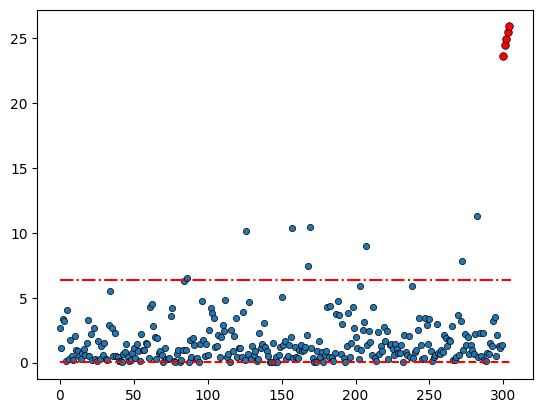

In [83]:
# read data
import numpy as np
data_2Doutlier = np.loadtxt('simple2D_outlier.csv', delimiter=',')

# compute Mahalanobis distances and transform into gaussian distribution using cubic-root
from sklearn.covariance import EmpiricalCovariance

emp_cov = EmpiricalCovariance().fit(data_2Doutlier)
MD_emp_cov = emp_cov.mahalanobis(data_2Doutlier)
MD_cubeRoot = np.power(MD_emp_cov, 0.333)

# find Hampel identifier bounds
from scipy import stats

median = np.median(MD_cubeRoot)
sigma_MAD = stats.median_abs_deviation(MD_cubeRoot)
upperBound_MD = np.power(median+3*sigma_MAD, 3)
lowerBound_MD = np.power(median-3*sigma_MAD, 3)

# plot Mahalanobis distances with bounds (last 5 samples are the outliers)
plt.figure(), plt.plot(MD_emp_cov[:-5], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(np.arange(300,305), MD_emp_cov[-5:], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)
plt.hlines(upperBound_MD, 0, 305, colors='r', linestyles='dashdot', label='Upper bound')
plt.hlines(lowerBound_MD, 0, 305, colors='r', linestyles='dashed', label='Lower bound')